In [2]:
import numpy as np
from scipy import stats
import scipy.stats
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import shapiro
from sklearn.preprocessing import scale, minmax_scale, robust_scale

In [5]:
df_titanic = pd.read_csv("Titanic.csv")
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
#결측치 
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#결측치 처리 - cabin은 너무 많아서 우선 생략
df_titanic["Embarked"].fillna("unknown", inplace = True)
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

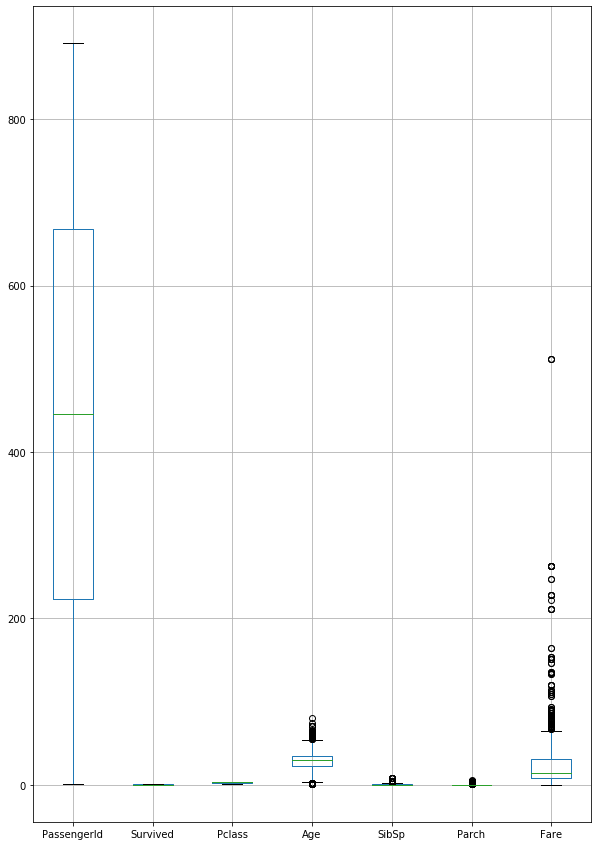

In [7]:
#이상치 찾기
df_titanic.boxplot(figsize = (10,15))

In [12]:
#잘 나타나지 않았서 이상치 제거는 따로 하지 않았습니다
df_titanic.sort_values(by = ['Fare'], ascending = False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
...,...,...,...,...,...,...,...,...,...,...,...,...
633,634,0,1,"Parr, Mr. William Henry Marsh",male,30.0,0,0,112052,0.0000,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,30.0,0,0,239853,0.0000,NaN,S
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0000,NaN,S
732,733,0,2,"Knight, Mr. Robert J",male,30.0,0,0,239855,0.0000,NaN,S


In [16]:
#변수 정하기
df_titanic = df_titanic.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis = 1)
df_titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


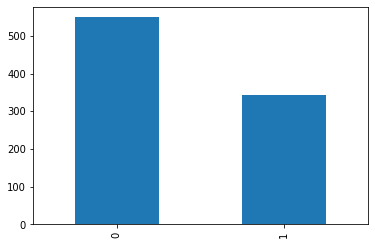

In [17]:
#생존여부 파악
df_count = df_titanic["Survived"].value_counts()
df_count.plot.bar()

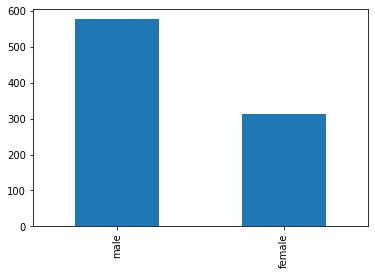

In [20]:
#타고있는 남성의 비율이 높음
df_count = df_titanic["Sex"].value_counts()
df_count.plot.bar()

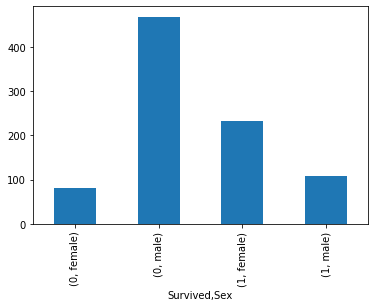

In [19]:
#남성의 죽은 비율이 현저히 높다
df_groupby_total = df_titanic.groupby(["Survived", "Sex"], as_index = False).size()
df_groupby_total.plot.bar()

C:\Users\cptas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\cptas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\cptas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\cptas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\cptas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\cptas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 50668 missing from curre

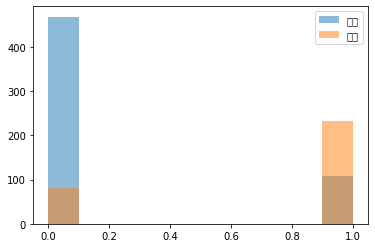

In [24]:
plt.hist(df_titanic[df_titanic["Sex"] == "male"]["Survived"], label = "남성", alpha = 0.5)
plt.hist(df_titanic[df_titanic["Sex"] == "female"]["Survived"], label = "여성", alpha = 0.5)
plt.legend()

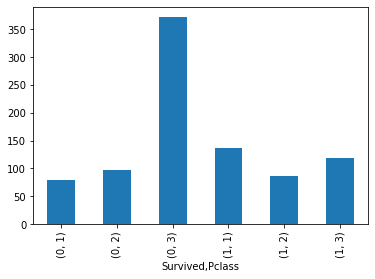

In [21]:
#등급별 
df_groupby_total = df_titanic.groupby(["Survived", "Pclass"], as_index = False).size()
df_groupby_total.plot.bar()

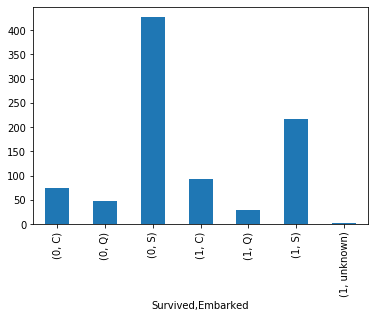

In [23]:
#승선위치
df_groupby_total = df_titanic.groupby(["Survived", "Embarked"], as_index = False).size()
df_groupby_total.plot.bar()

##그저 S위치에서 많이 탔다고 추정만 가능할 뿐 죽음과는 관계가 없다.

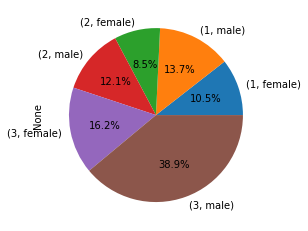

In [29]:
#성별과 클래스에 따른 비율
df_count = df_titanic.groupby(["Pclass", "Sex"]).size()
df_count.plot.pie(y = "Survived", autopct = "%.1f%%")

범주형 자료 중 성별과 Pclass가 생존과 연관이 깊다고 할 수 있다.
나머지 변수들은 다른 가공을 필요로 해보인다.
수업이 진행 후 해보고자 한다.